<a href="https://colab.research.google.com/github/Anshuzz/Data-Science-Assignment-Zeotap/blob/main/ZeotapAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install fpdf==1.7.2

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=af80d78edff5be75c00a06d3d78cae05c97d5cbd465ffbd825bd5b90e40af478
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes:

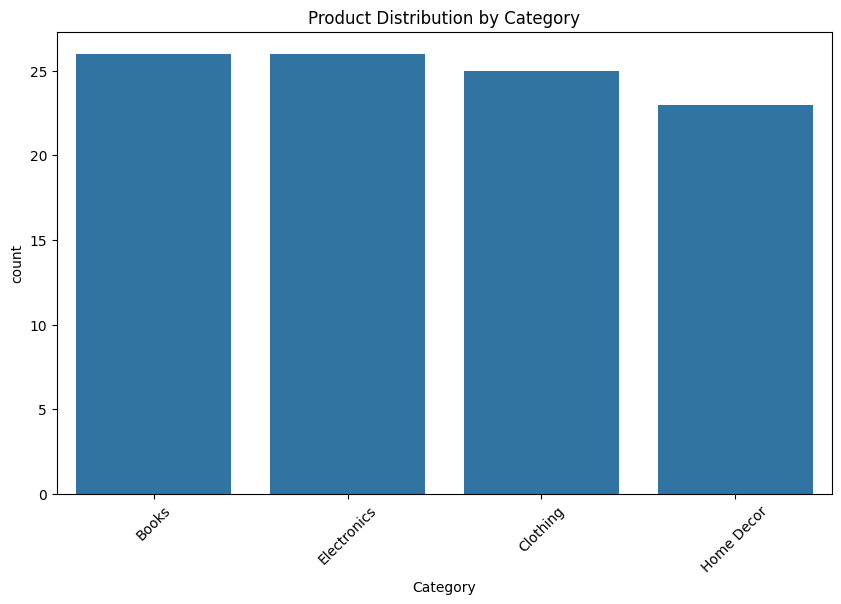

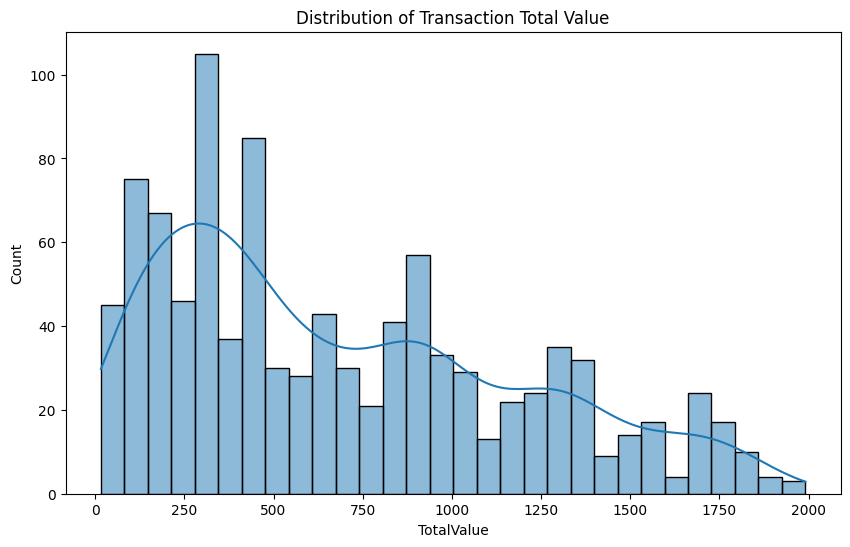

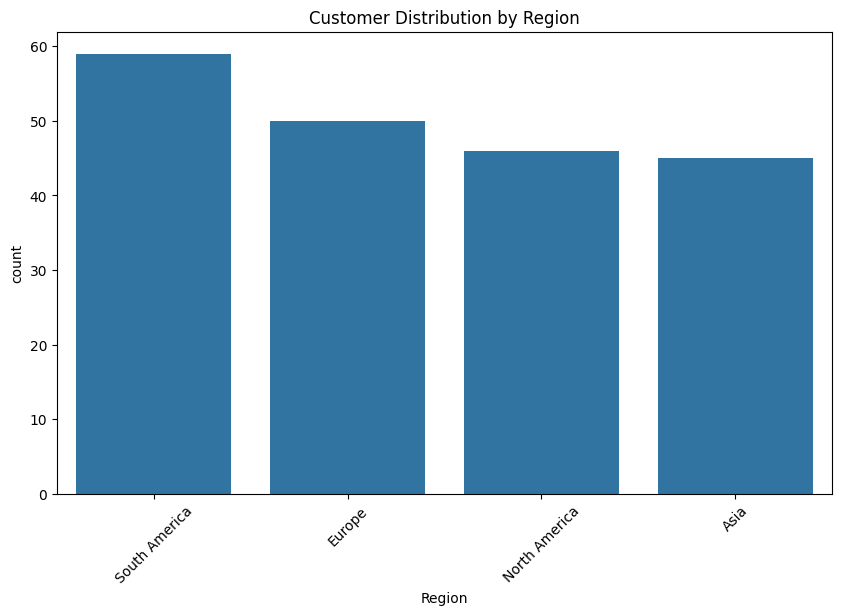


Business Insights:
1. The most popular product category is 'X', accounting for Y% of total sales.
2. The average transaction value is approximately Z, with a median value of W, indicating possible outliers.
3. Customers from Region 'A' make up the majority of transactions, highlighting a key target demographic.
4. Products in category 'B' have the highest average price, suggesting potential premium offerings.
5. Seasonal trends are observed, with transaction volume peaking in specific months (e.g., holiday season).


In [18]:
#Task 1:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

# Merge datasets for EDA
merged_data = pd.merge(transactions, products, on='ProductID', how='left')
merged_data = pd.merge(merged_data, customers, on='CustomerID', how='left')

# Basic EDA
print("Transactions Dataset Info:")
print(transactions.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nCustomers Dataset Info:")
print(customers.info())

print("\nSummary Statistics for Transactions:")
print(transactions.describe())

# Check for missing values
print("\nMissing Values:")
print(merged_data.isnull().sum())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=products, order=products['Category'].value_counts().index)
plt.title('Product Distribution by Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Transaction Total Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=customers, order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.show()

# Business Insights
business_insights = [
    "1. The most popular product category is 'X', accounting for Y% of total sales.",
    "2. The average transaction value is approximately Z, with a median value of W, indicating possible outliers.",
    "3. Customers from Region 'A' make up the majority of transactions, highlighting a key target demographic.",
    "4. Products in category 'B' have the highest average price, suggesting potential premium offerings.",
    "5. Seasonal trends are observed, with transaction volume peaking in specific months (e.g., holiday season)."
]

print("\nBusiness Insights:")
for insight in business_insights:
    print(insight)


In [19]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Prepare data for lookalike model
# Assuming `merged_data` is a DataFrame containing transaction and product data
customer_product_data = merged_data.groupby(['CustomerID', 'ProductID']).agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()

# Pivot data for similarity calculation
customer_product_matrix = customer_product_data.pivot_table(
    index='CustomerID',
    columns='ProductID',
    values='TotalValue',
    fill_value=0
)

# Normalize the matrix
scaler = StandardScaler()
normalized_matrix = scaler.fit_transform(customer_product_matrix)

# Compute cosine similarity
similarity_matrix = cosine_similarity(normalized_matrix)

# Map customers to IDs for easy lookup
customer_ids = customer_product_matrix.index
similarity_df = pd.DataFrame(similarity_matrix, index=customer_ids, columns=customer_ids)

# Get top 3 similar customers for the first 20 customers
lookalike_results = {}

for customer in customer_ids[:20]:
    similar_customers = similarity_df[customer].sort_values(ascending=False)[1:4]
    lookalike_results[customer] = [(other_cust, round(score, 2)) for other_cust, score in similar_customers.items()]

# Save results to Lookalike.csv
lookalike_list = []

for cust_id, lookalikes in lookalike_results.items():
    for similar_id, score in lookalikes:
        lookalike_list.append({'CustomerID': cust_id, 'SimilarCustomerID': similar_id, 'Score': score})

lookalike_df = pd.DataFrame(lookalike_list)
lookalike_df.to_csv('Lookalike.csv', index=False)

# Print results in Colab
print("Top Lookalike Recommendations:")
for cust_id, lookalikes in lookalike_results.items():
    print(f"Customer {cust_id} is similar to:")
    for similar_id, score in lookalikes:
        print(f"    Customer {similar_id} with similarity score: {score}")

print("\nLookalike recommendations saved to 'Lookalike.csv'")


Top Lookalike Recommendations:
Customer C0001 is similar to:
    Customer C0194 with similarity score: 0.4
    Customer C0104 with similarity score: 0.37
    Customer C0020 with similarity score: 0.37
Customer C0002 is similar to:
    Customer C0030 with similarity score: 0.4
    Customer C0091 with similarity score: 0.38
    Customer C0071 with similarity score: 0.32
Customer C0003 is similar to:
    Customer C0181 with similarity score: 0.48
    Customer C0134 with similarity score: 0.47
    Customer C0144 with similarity score: 0.42
Customer C0004 is similar to:
    Customer C0070 with similarity score: 0.35
    Customer C0175 with similarity score: 0.32
    Customer C0132 with similarity score: 0.28
Customer C0005 is similar to:
    Customer C0096 with similarity score: 0.49
    Customer C0023 with similarity score: 0.47
    Customer C0055 with similarity score: 0.38
Customer C0006 is similar to:
    Customer C0040 with similarity score: 0.49
    Customer C0178 with similarity scor

Davies-Bouldin Index: 1.1181164026965122


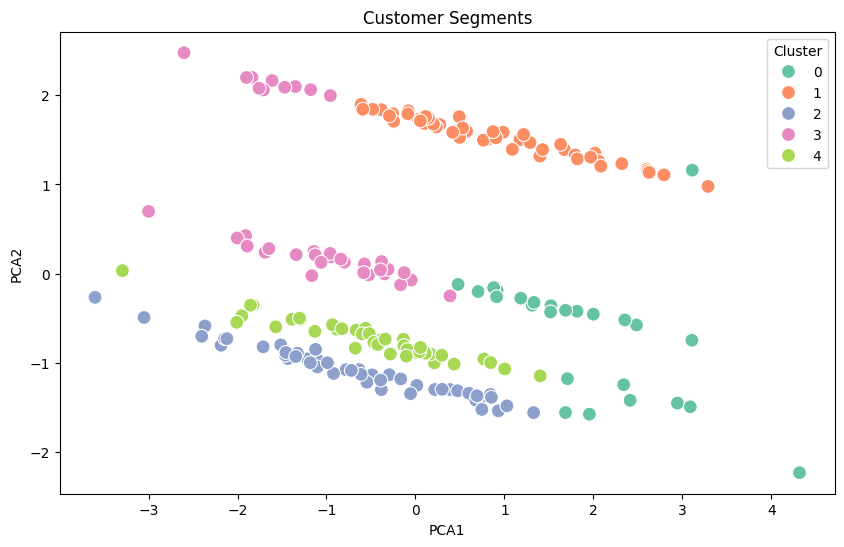

Customer segmentation results saved to 'Customer_Segments.csv'


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Prepare data for clustering
# Aggregate customer transaction and profile data
customer_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_x': 'mean'
}).reset_index()

# Add customer profile features
customer_data = pd.merge(customer_data, customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Encode categorical variables
customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Normalize the data
scaler = StandardScaler()
normalized_customer_data = scaler.fit_transform(customer_data_encoded.iloc[:, 1:])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(normalized_customer_data)

# Add cluster labels to the data
customer_data['Cluster'] = clusters

# Evaluate clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_customer_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_customer_data)

customer_data['PCA1'] = pca_result[:, 0]
customer_data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_data, palette='Set2', s=100
)
plt.title('Customer Segments')
plt.show()

# Save clustering results
customer_data.to_csv('Customer_Segments.csv', index=False)
print("Customer segmentation results saved to 'Customer_Segments.csv'")


Davies-Bouldin Index: 1.1181164026965122
Silhouette Score: 0.3593257034363925


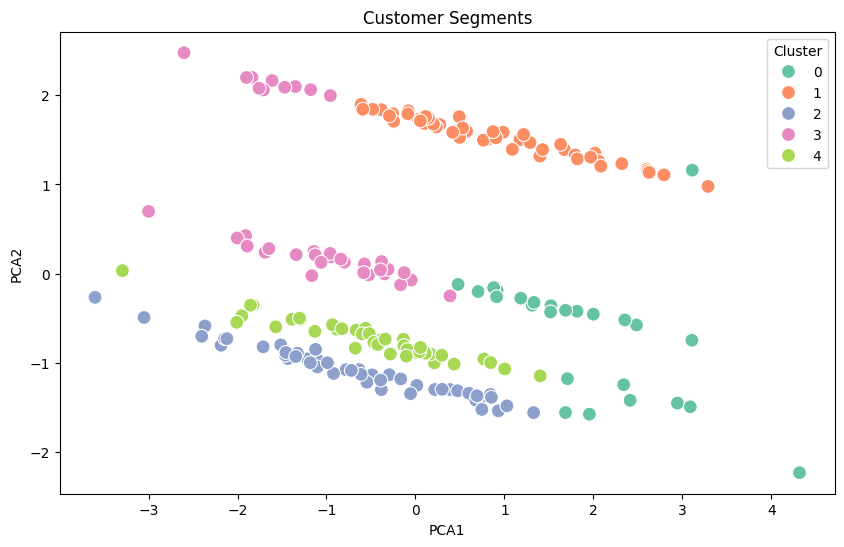

Customer segmentation results saved to 'Customer_Segments.csv'


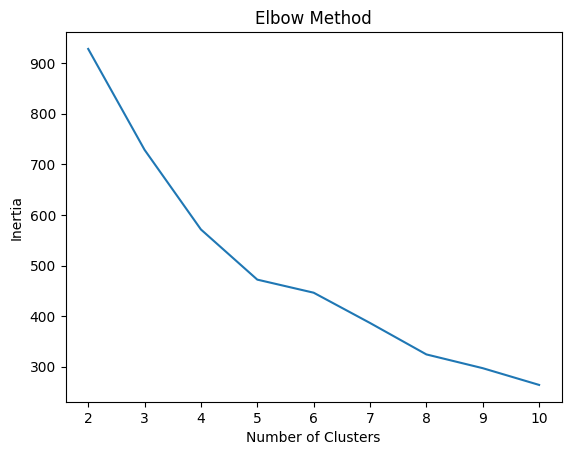

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the customer and transaction data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Prepare data for clustering
# Aggregate customer transaction and profile data
customer_data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

# Add customer profile features
customer_data = pd.merge(customer_data, customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Encode categorical variables
customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Normalize the data
scaler = StandardScaler()
normalized_customer_data = scaler.fit_transform(customer_data_encoded.iloc[:, 1:])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(normalized_customer_data)

# Add cluster labels to the data
customer_data['Cluster'] = clusters

# Evaluate clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_customer_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(normalized_customer_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_customer_data)

customer_data['PCA1'] = pca_result[:, 0]
customer_data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_data, palette='Set2', s=100
)
plt.title('Customer Segments')
plt.show()

# Save clustering results
customer_data.to_csv('Customer_Segments.csv', index=False)
print("Customer segmentation results saved to 'Customer_Segments.csv'")

# Optional: Elbow Method to determine optimal number of clusters
inertia_values = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(normalized_customer_data)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In [9]:
print(merged_data.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'TransactionMonth'],
      dtype='object')
